This project began as a result of being assigned Equatorial Guinea for a school project in a geography class. The data analysis was not part of the project, it was just an extension of existing interest in the country sparked by it. Looking online for data regarding Equatorial Guinea, one dataset that seemed interesting was a dataset of <a href="https://data.world/datainspace/nighttime-luminosity-africa">nighttime luminosity in Africa</a>, but the dataset did not include much data regarding Equatorial Guinea, so I decided to collect some myself.

I used NASA's GIBS to collect data about nighttime luminosity, searching for only tiles that contained the longitude and latitude coordinates of the 10 largest cities in Equatorial Guinea (Bata, Malabo, Ebebiyín, Aconibe, Añisoc, Luba, Evaniyong, Mongomo, Mengomeyén, and Micomeseng). I then used their coordinates and the minimum and maximum coordinates included in the tile that they are in to calculate their approximate pixel position in the image, then used NumPy to change the pixel coordinates by a random, small amount, in order to not measure the same pixel each time.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

In [9]:
df = pd.read_csv("v1\\data.csv")
names = df.columns.to_list()
names.remove("Date")
dates = df.loc[:, "Date"].to_list()
dates = np.asarray(dates, dtype='datetime64[s]')

C:\Users\nicoc\AppData\Local\Temp\ipykernel_20408\3405460371.py:7: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(nbins=12)


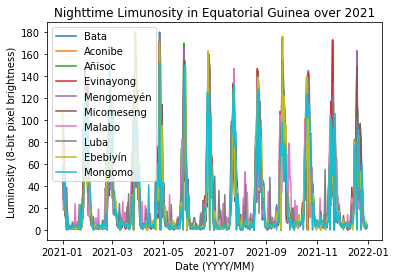

In [10]:
for name in names:
    plt.plot(dates, df.loc[:, name].to_list(), label=name)
plt.xlabel('Date (YYYY/MM)')
plt.ylabel('Luminosity (8-bit pixel brightness)')
plt.title('Nighttime Limunosity in Equatorial Guinea over 2021')
plt.legend()
plt.locator_params(nbins=12)
plt.show()

In [11]:
ranks = []
for name in names:
    temp = df.loc[:, name].to_list()
    mean = sum(temp)/len(temp)
    ranks.append((-mean, name))
ranks.sort()
ranks = [(f'{-mean:.3f}', name) for (mean, name) in ranks]
for item in ranks:
    print(f'{item}\n')

('25.732', 'Añisoc')

('25.652', 'Mengomeyén')

('25.403', 'Aconibe')

('25.389', 'Evinayong')

('25.211', 'Malabo')

('25.112', 'Micomeseng')

('25.022', 'Bata')

('24.970', 'Luba')

('24.003', 'Ebebiyín')

('23.677', 'Mongomo')



Interestingly, the above rankings (which track average nighttime luminosity across the year) appear to be mostly random, and not at all indicative of population, with the most luminous apparently being Añisoc, which is significantly less populated than the most populous city of Bata, and the capital of Malabo. I would do a hypothesis test to check if these differences are significant, but looking at the statistics generated in the file stats.csv, all of these means appear to fall well within a standard deviation of each other, so it seems like that is unnecessary. 

It seems as if this data is not properly equipped to handle comparisons between cities, as I had initially intended to be, but it can still reveal certain interesting patterns, be they about Equatorial Guinea or GIBS itself. The most striking pattern in the data is the cyclical pattern of sharp peaks in luminosity the 25th of every month and troughs the rest of the month. Looking at the NASA <a href="https://worldview.earthdata.nasa.gov/?v=5.237696725275443,0.024749407628275044,12.387447533465098,3.368987688878275&l=GRUMP_Settlements,Reference_Labels_15m(hidden),Reference_Features_15m(hidden),Coastlines_15m,VIIRS_SNPP_DayNightBand_At_Sensor_Radiance,VIIRS_SNPP_DayNightBand_AtSensor_M15(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor(hidden)&lg=true&s=11.3353,2.1556&t=2022-01-25-T00%3A00%3A00Z">EOSDIS website</a> for visualizing GIBS, it seems as if there are clouds that artificially increase the pixel's luminosity. I thought that a better test would be a comparison between the luminosity of the pixel in relation to a place in Equatorial Guinea with no large settlement in order to lower the variance, so I redid the data collection, this time subtracting a control value and lowering the standard deviation for the pixel randomizer so the pixels chosen are closer to the mean. The results can be seen below.

In [15]:
df = pd.read_csv("v2\\data.csv")
names = df.columns.to_list()

C:\Users\nicoc\AppData\Local\Temp\ipykernel_20408\3405460371.py:7: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(nbins=12)


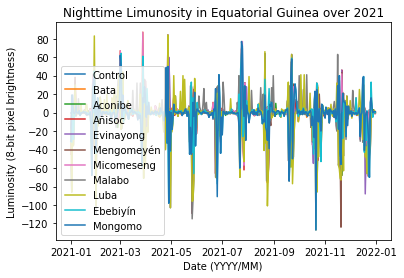

In [16]:
for name in names:
    plt.plot(dates, df.loc[:, name].to_list(), label=name)
plt.xlabel('Date (YYYY/MM)')
plt.ylabel('Luminosity (8-bit pixel brightness)')
plt.title('Nighttime Limunosity in Equatorial Guinea over 2021')
plt.legend()
plt.locator_params(nbins=12)
plt.show()

In [17]:
ranks = []
for name in names:
    temp = df.loc[:, name].to_list()
    mean = sum(temp)/len(temp)
    ranks.append((-mean, name))
ranks.sort()
ranks = [(f'{-mean:.3f}', name) for (mean, name) in ranks]
for item in ranks:
    print(f'{item}\n')

('0.392', 'Micomeseng')

('0.000', 'Control')

('-0.671', 'Aconibe')

('-1.049', 'Mengomeyén')

('-1.438', 'Mongomo')

('-1.597', 'Bata')

('-1.816', 'Evinayong')

('-2.137', 'Ebebiyín')

('-2.151', 'Añisoc')

('-4.049', 'Malabo')

('-5.367', 'Luba')



Unfortunately, it still seemed as if there is no relation between population and nighttime luminosity, so I revisited my original formula for getting the pixel position of a certain set of coordinates. Originally, I had made a mistake when calculating the pixel position. I had initially taken the latitude, subtracted it from the minimum latitude that fits in the same tile, then checked how many times 512 goes evenly into that number (because the pictures are 512x512), and done the same thing for longitude. As it so happens, this resulted in every city getting the same pixel coordinate of (-1, 0). What I had intended to do was get 512 over the difference between the maximum and minimum value to get a conversion factor from latitude/longitude into x/y axis pixel position, then multiplied that by the difference between the latitude/longitude of the city and the minimum latitude/longitude that fits on the tile. After doing this, the data seemed far more in line with what I expected.

In [21]:
df = pd.read_csv("data.csv")
names = df.columns.to_list()

C:\Users\nicoc\AppData\Local\Temp\ipykernel_20408\3405460371.py:7: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(nbins=12)


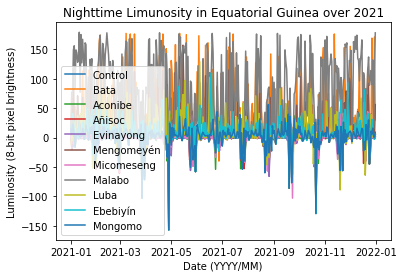

In [22]:
for name in names:
    plt.plot(dates, df.loc[:, name].to_list(), label=name)
plt.xlabel('Date (YYYY/MM)')
plt.ylabel('Luminosity (8-bit pixel brightness)')
plt.title('Nighttime Limunosity in Equatorial Guinea over 2021')
plt.legend()
plt.locator_params(nbins=12)
plt.show()

In [23]:
ranks = []
for name in names:
    temp = df.loc[:, name].to_list()
    mean = sum(temp)/len(temp)
    ranks.append((-mean, name))
ranks.sort()
ranks = [(f'{-mean:.3f}', name) for (mean, name) in ranks]
for item in ranks:
    print(f'{item}\n')

('82.268', 'Malabo')

('47.997', 'Bata')

('19.575', 'Mengomeyén')

('11.296', 'Luba')

('9.386', 'Ebebiyín')

('1.203', 'Mongomo')

('0.000', 'Control')

('-0.466', 'Aconibe')

('-0.671', 'Evinayong')

('-0.882', 'Micomeseng')

('-1.816', 'Añisoc')

